In [22]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

path = r"C:/Users/athin/Downloads/OnlineRetail.csv"


# Try Latin-1
try:
    df = pd.read_csv(path, encoding='latin1')
    print("Loaded with latin1")
except UnicodeDecodeError:
    # Try Windows-1252
    df = pd.read_csv(path, encoding='cp1252')
    print("Loaded with cp1252")

df.head()


Loaded with latin1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# ---- BASIC INFO ----
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
df.info()

Rows: 541909
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# ---- CONVERT DATE COLUMN ----
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# ---- REMOVE ROWS WITHOUT CUSTOMER ID ----
df = df.dropna(subset=['CustomerID'])

In [10]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.shape

(406829, 8)

In [12]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [13]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [16]:
# ---- REMOVE NEGATIVE QUANTITIES (credit notes) ----
df = df[df['Quantity'] > 0]

# ---- REMOVE ZERO OR NEGATIVE PRICES ----
df = df[df['UnitPrice'] > 0]

In [17]:
# ---- REMOVE OUTLIERS USING QUANTITY ----
Q1 = df['Quantity'].quantile(0.01)
Q3 = df['Quantity'].quantile(0.99)
df = df[(df['Quantity'] >= Q1) & (df['Quantity'] <= Q3)]

In [18]:
# ---- REMOVE OUTLIERS USING PRICE ----
P1 = df['UnitPrice'].quantile(0.01)
P3 = df['UnitPrice'].quantile(0.99)
df = df[(df['UnitPrice'] >= P1) & (df['UnitPrice'] <= P3)]

In [19]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,381246.000000,381246,381246.000000,381246.000000
mean,9.805029,2011-07-10 16:06:47.890024192,2.756873,15296.429161
min,1.000000,2010-12-01 08:26:00,0.290000,12347.000000
25%,2.000000,2011-04-06 16:47:00,1.250000,13969.000000
50%,6.000000,2011-07-31 11:45:00,1.950000,15159.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000
max,120.000000,2011-12-09 12:50:00,14.950000,18287.000000
std,14.328660,NaN,2.545314,1709.994752


In [20]:
# ---- CREATE REVENUE COLUMN ----
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Histogram and Boxplot of Revenue

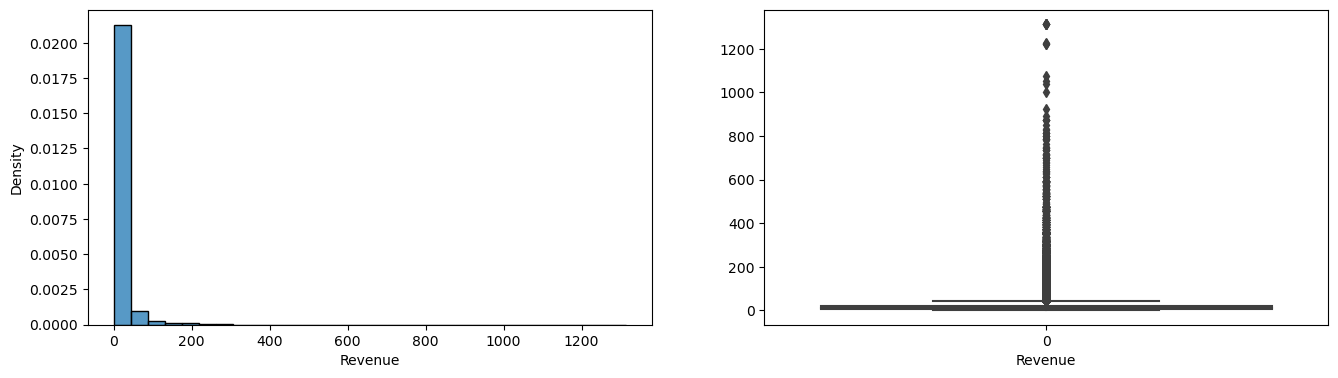

In [24]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.histplot(df['Revenue'],bins=30, stat="density", kde=False, edgecolor="black")
plt.xlabel("Revenue") 

plt.subplot(2,2,2)
sns.boxplot(df['Revenue'])
plt.xlabel("Revenue") 
plt.show()

## Histogram and Boxplot of Quantity

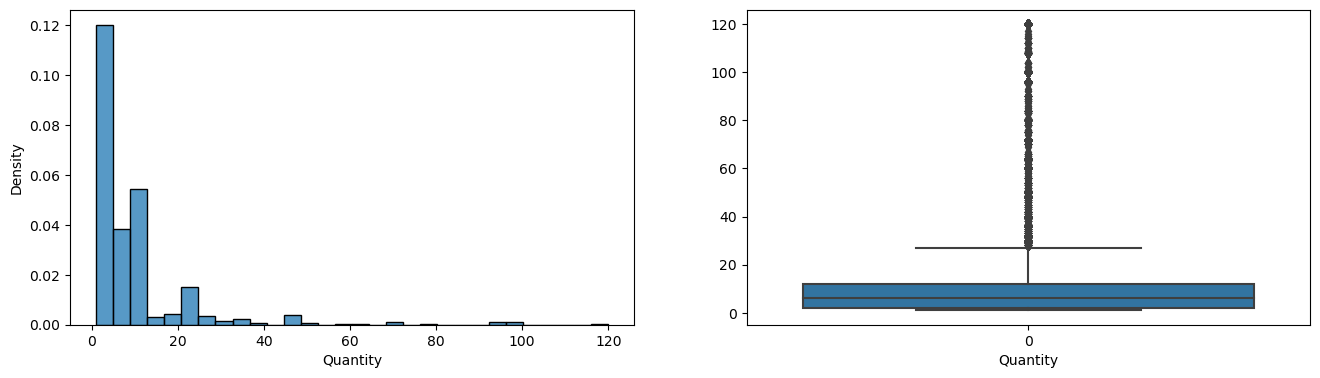

In [25]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.histplot(df['Quantity'],bins=30, stat="density", kde=False, edgecolor="black")
plt.xlabel("Quantity") 

plt.subplot(2,2,2)
sns.boxplot(df['Quantity'])
plt.xlabel("Quantity") 
plt.show()

## Histogram and Boxplot of UnitPrice

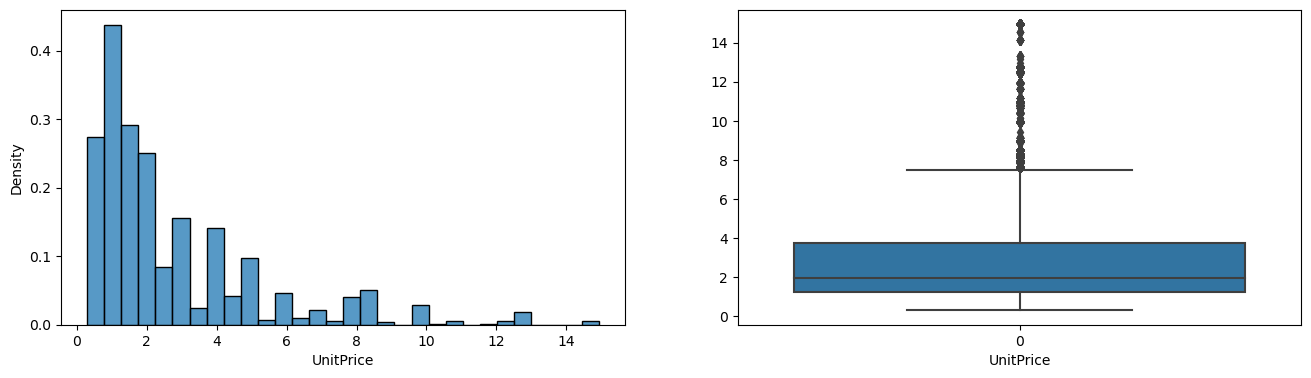

In [26]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.histplot(df['UnitPrice'],bins=30, stat="density", kde=False, edgecolor="black")
plt.xlabel("UnitPrice") 

plt.subplot(2,2,2)
sns.boxplot(df['UnitPrice'])
plt.xlabel("UnitPrice") 
plt.show()

In [ ]:

sns.pairplot(df, hue='Revenue')
plt.suptitle("Pairplots")
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001ACBE77C4A0> (for post_execute):
